In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs

## Fifa Dataset

**1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed.
Note: 
1) Perform all the Statistical analysis with 5%(Significance level). 
2) Perform the test of normality and test of variance in the appropriate places.**

In [2]:
#1-->Importing/ Reading the dataset

fifa_df = pd.read_csv('fifa_stats.csv')
fifa_df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
#-->Understanding the type of variables

fifa_df.info()

#Incorrect data types:
    #We can see Jersey number, International Reputation, Weak Foot, Skill Moves are wrongly identified as int when these 
    #features actually belong to Categoric type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
Name                        2000 non-null object
Age                         2000 non-null int64
Nationality                 2000 non-null object
Overall_rating              2000 non-null int64
Potential                   2000 non-null int64
Club                        1981 non-null object
Preferred Foot              2000 non-null object
International Reputation    2000 non-null int64
Weak Foot                   2000 non-null int64
Skill Moves                 2000 non-null int64
Work Rate                   2000 non-null object
Position                    2000 non-null object
Jersey Number               2000 non-null int64
Height                      2000 non-null float64
Weight                      2000 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 234.5+ KB


In [4]:
fifa_df['International Reputation'] = fifa_df['International Reputation'].astype(object)
fifa_df['Weak Foot'] = fifa_df['Weak Foot'].astype(object)
fifa_df['Skill Moves'] = fifa_df['Skill Moves'].astype(object)
fifa_df['Jersey Number'] = fifa_df['Jersey Number'].astype(object)

In [5]:
#After appropriate data type conversion

fifa_df.info()

#There are 10 categoric variables and 5 numberic variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
Name                        2000 non-null object
Age                         2000 non-null int64
Nationality                 2000 non-null object
Overall_rating              2000 non-null int64
Potential                   2000 non-null int64
Club                        1981 non-null object
Preferred Foot              2000 non-null object
International Reputation    2000 non-null object
Weak Foot                   2000 non-null object
Skill Moves                 2000 non-null object
Work Rate                   2000 non-null object
Position                    2000 non-null object
Jersey Number               2000 non-null object
Height                      2000 non-null float64
Weight                      2000 non-null int64
dtypes: float64(1), int64(4), object(10)
memory usage: 234.5+ KB


In [6]:
# Checking for duplicate records

fifa_df[(fifa_df.duplicated()==True)]

#There are no duplicate records in the dataset

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight


In [7]:
#-->Descriptive statistics

# For numeric variables:
fifa_df.describe()

#It could be seen that:
    #1. Average age of the players in the dataset is around 27 yrs(between 24 to 30 yrs) -- mostly the young crowd likely to be unmarried
    #2. The players seem to have high potential with 50 % of players in data having potential above 80%
    #3. There is not much difference in rating and potential although on an average overall rating is less than the score of potential
    

,Age,Overall_rating,Potential,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.443337,16.050306
min,17.000000,75.000000,75.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,6.583333,227.000000


In [8]:
# For categoric variables:

fifa_df.describe(include = np.object)

#It could be seen that:
    #1. There are very few null values in club variable 
    #2. The data has more of Right - preferred foot almost 75%
    #3. Most of the players have the least score of international reputation which can imply the dataset has some young talents not experienced in international platform
    #4. Most of the players (about 10%) come from Spain nation and file has mostly goal keepers (GK) data

,Name,Nationality,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number
count,2000,2000,1981,2000,2000,2000,2000,2000,2000,2000
unique,1970,95,285,2,5,5,5,8,27,67
top,Marcelo,Spain,Chelsea,Right,1,3,3,Medium/ Medium,GK,10
freq,3,251,24,1534,866,1072,828,733,194,125


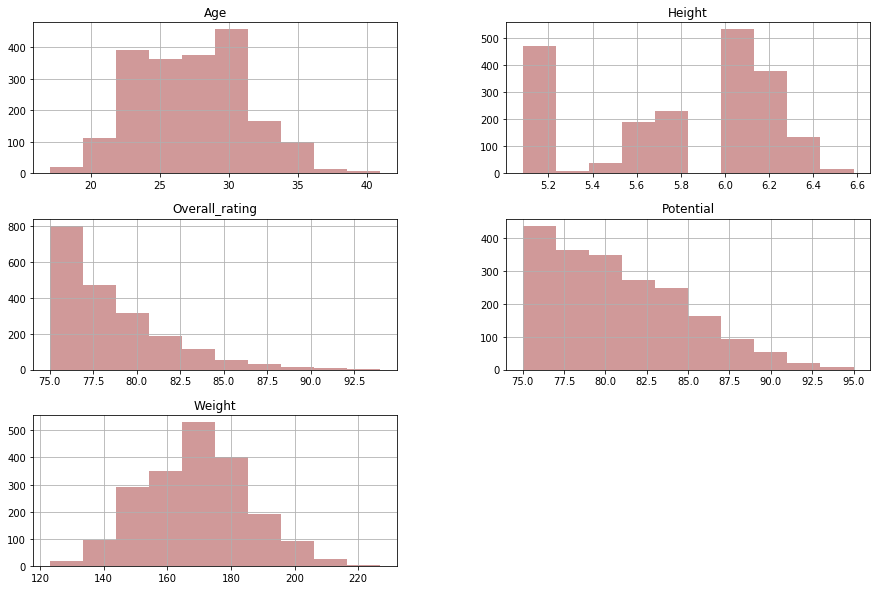

Age               0.197101
Overall_rating    1.370811
Potential         0.673408
Height           -0.539604
Weight            0.156247
dtype: float64

In [9]:
#4-->Univariate Analysis:
# For numeric Variables:
plt.rcParams['figure.figsize']=[15,10]
fifa_df_numeric = fifa_df.select_dtypes(include = np.number)
fifa_df_numeric.hist(color='darkred',alpha=0.4)
plt.show()
fifa_df_numeric.skew()

#Observations:
    #1. Overall_rating and Potential are positively right skewed data; Height is negatively skewed
    #2. Age and weight are near symmetric

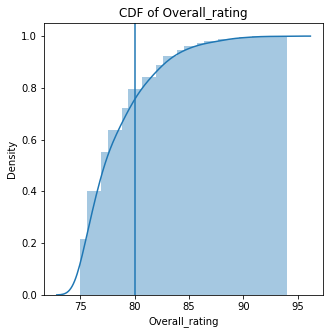

In [9]:
plt.figure(figsize=(5,5))
sns.distplot(fifa_df['Overall_rating'],hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
plt.title("CDF of Overall_rating")
plt.axvline(80)
plt.show()
#Probabality of players having overall_rating less than 80 is around 75%

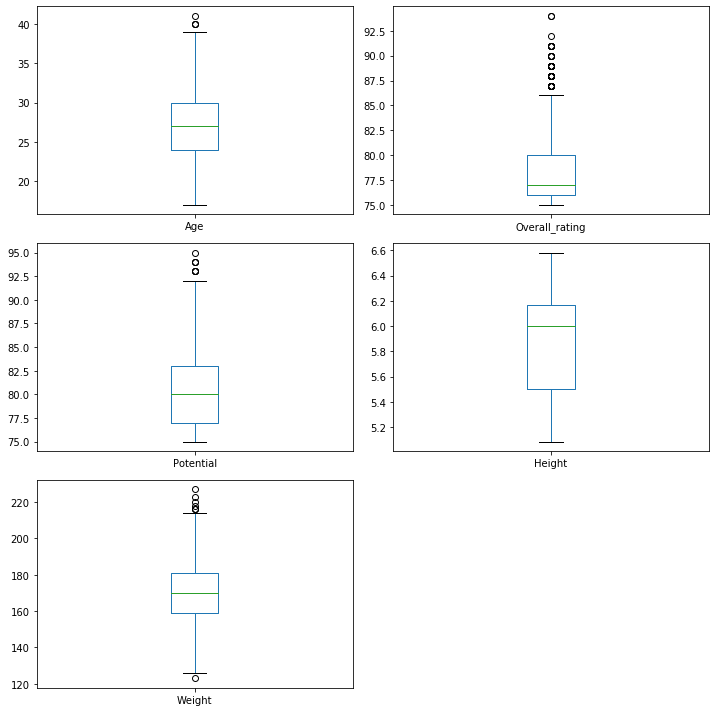

In [12]:
#Box plot of numeric variables
fifa_df_numeric.plot(kind = 'box',subplots = True,layout=(3,2),figsize=(10,10))
plt.tight_layout()
plt.show()

#Observations: 
    #1. It is evident there are more outliers in Overall_rating,Potential that needs to be treated
    #2. Height feature has no outlier implying data is consistent although it is negatively skewed a little
    #3. Age has less no of outliers and Weight has most of the outliers just above the max value

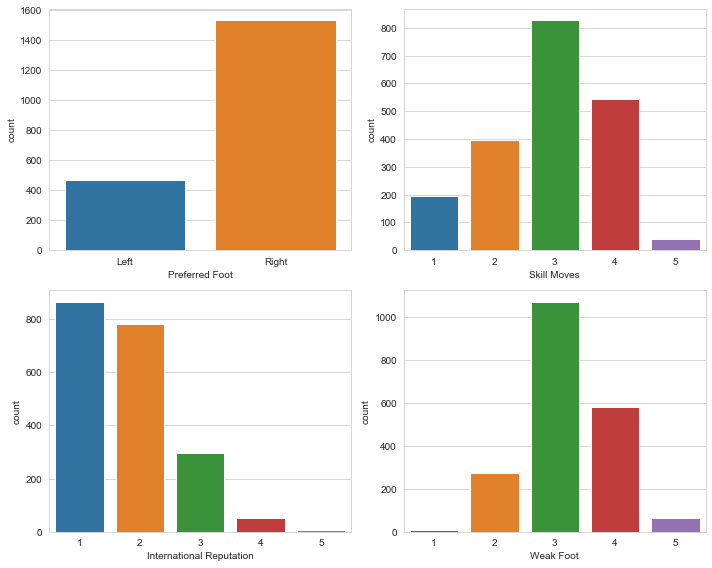

In [14]:
#For categoric variables:
fifa_df_categoric=fifa_df.select_dtypes(include=np.object)
fig,ax=plt.subplots(2,2,figsize=(10,8))
sns.set_style(style='whitegrid')
sns.countplot(x='Preferred Foot',data=fifa_df_categoric,ax=ax[0][0])
sns.countplot(x='Skill Moves',data=fifa_df_categoric,ax=ax[0][1])
sns.countplot(x='International Reputation',data=fifa_df_categoric,ax=ax[1][0])
sns.countplot(x='Weak Foot',data=fifa_df_categoric,ax=ax[1][1])
plt.tight_layout()

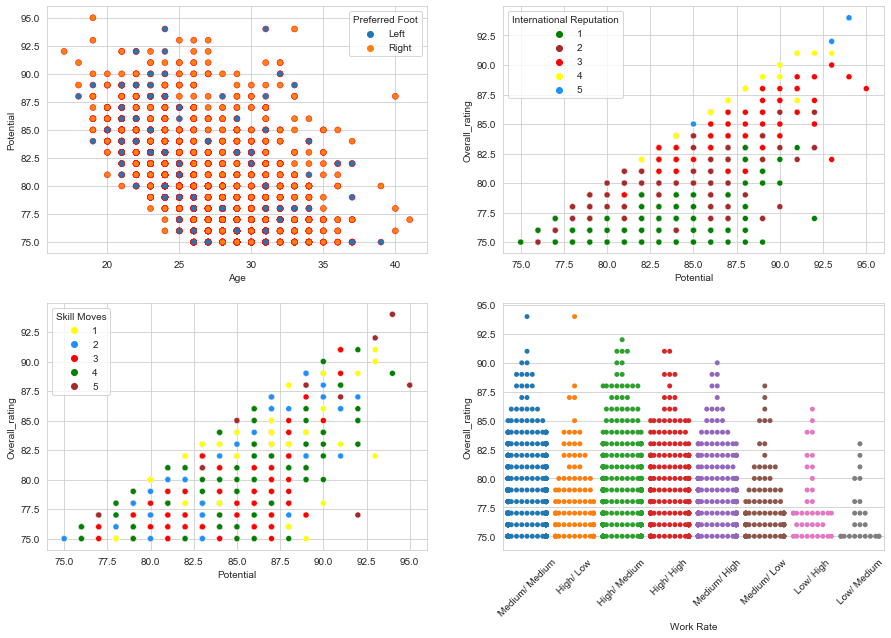

In [19]:
#Bivariate Analysis/Multivariate analysis
fig,ax=plt.subplots(2,2,figsize=(15,10))
sns.scatterplot(x='Age',y='Potential',hue='Preferred Foot',data=fifa_df,edgecolor='red',ax=ax[0][0])
sns.scatterplot(x='Potential',y='Overall_rating',data=fifa_df,hue='International Reputation',ax=ax[0][1],palette=['green','brown','red','yellow','dodgerblue'])
sns.scatterplot(x='Potential',y='Overall_rating',data=fifa_df,hue='Skill Moves',ax=ax[1][0],palette=['yellow','dodgerblue','red','green','brown'])
a=sns.swarmplot(x='Work Rate',y='Overall_rating',data=fifa_df,ax=ax[1][1])
a.set_xticklabels(labels=list(fifa_df['Work Rate'].unique()),rotation=45)
plt.show()

#Observations:
    #1.There is a slightly negative correlation between age and potential
    #2.There is a postive relation between overall_rating and potential and mostly there are players with low international reputation score (1) inspite of some having potential above 80
    #3. the one with highest skill moves score has the highest overall_rating although there seems to be a case where skill move score and potential is high but overall rating is very less
    #4. the one with highest overall_rating seem to have work rate of Medium/medium or high/low

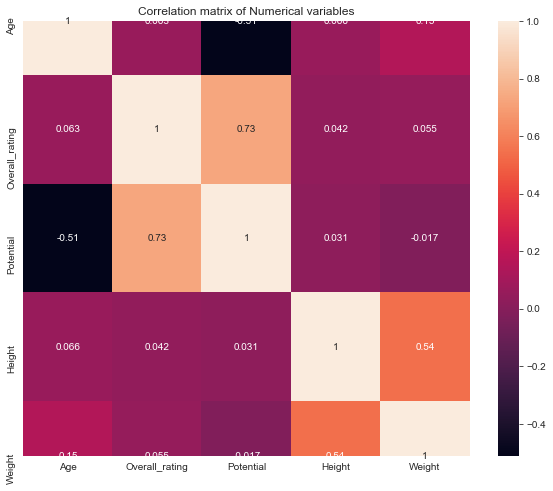

In [20]:
#Multivariate analysis - for numeric variables
plt.figure(figsize=(10,8))
sns.heatmap(fifa_df_numeric.corr(),annot=True)
plt.title("Correlation matrix of Numerical variables")
plt.show()

#From the below graph it could be concluded that,
    #1. Potential and Overall Rating are positively correlated - stronger relationship
    #2. Height and Weight are also positively correlated - moderate relationship
    #3. Potentail and Age are negatively related - moderate relationship

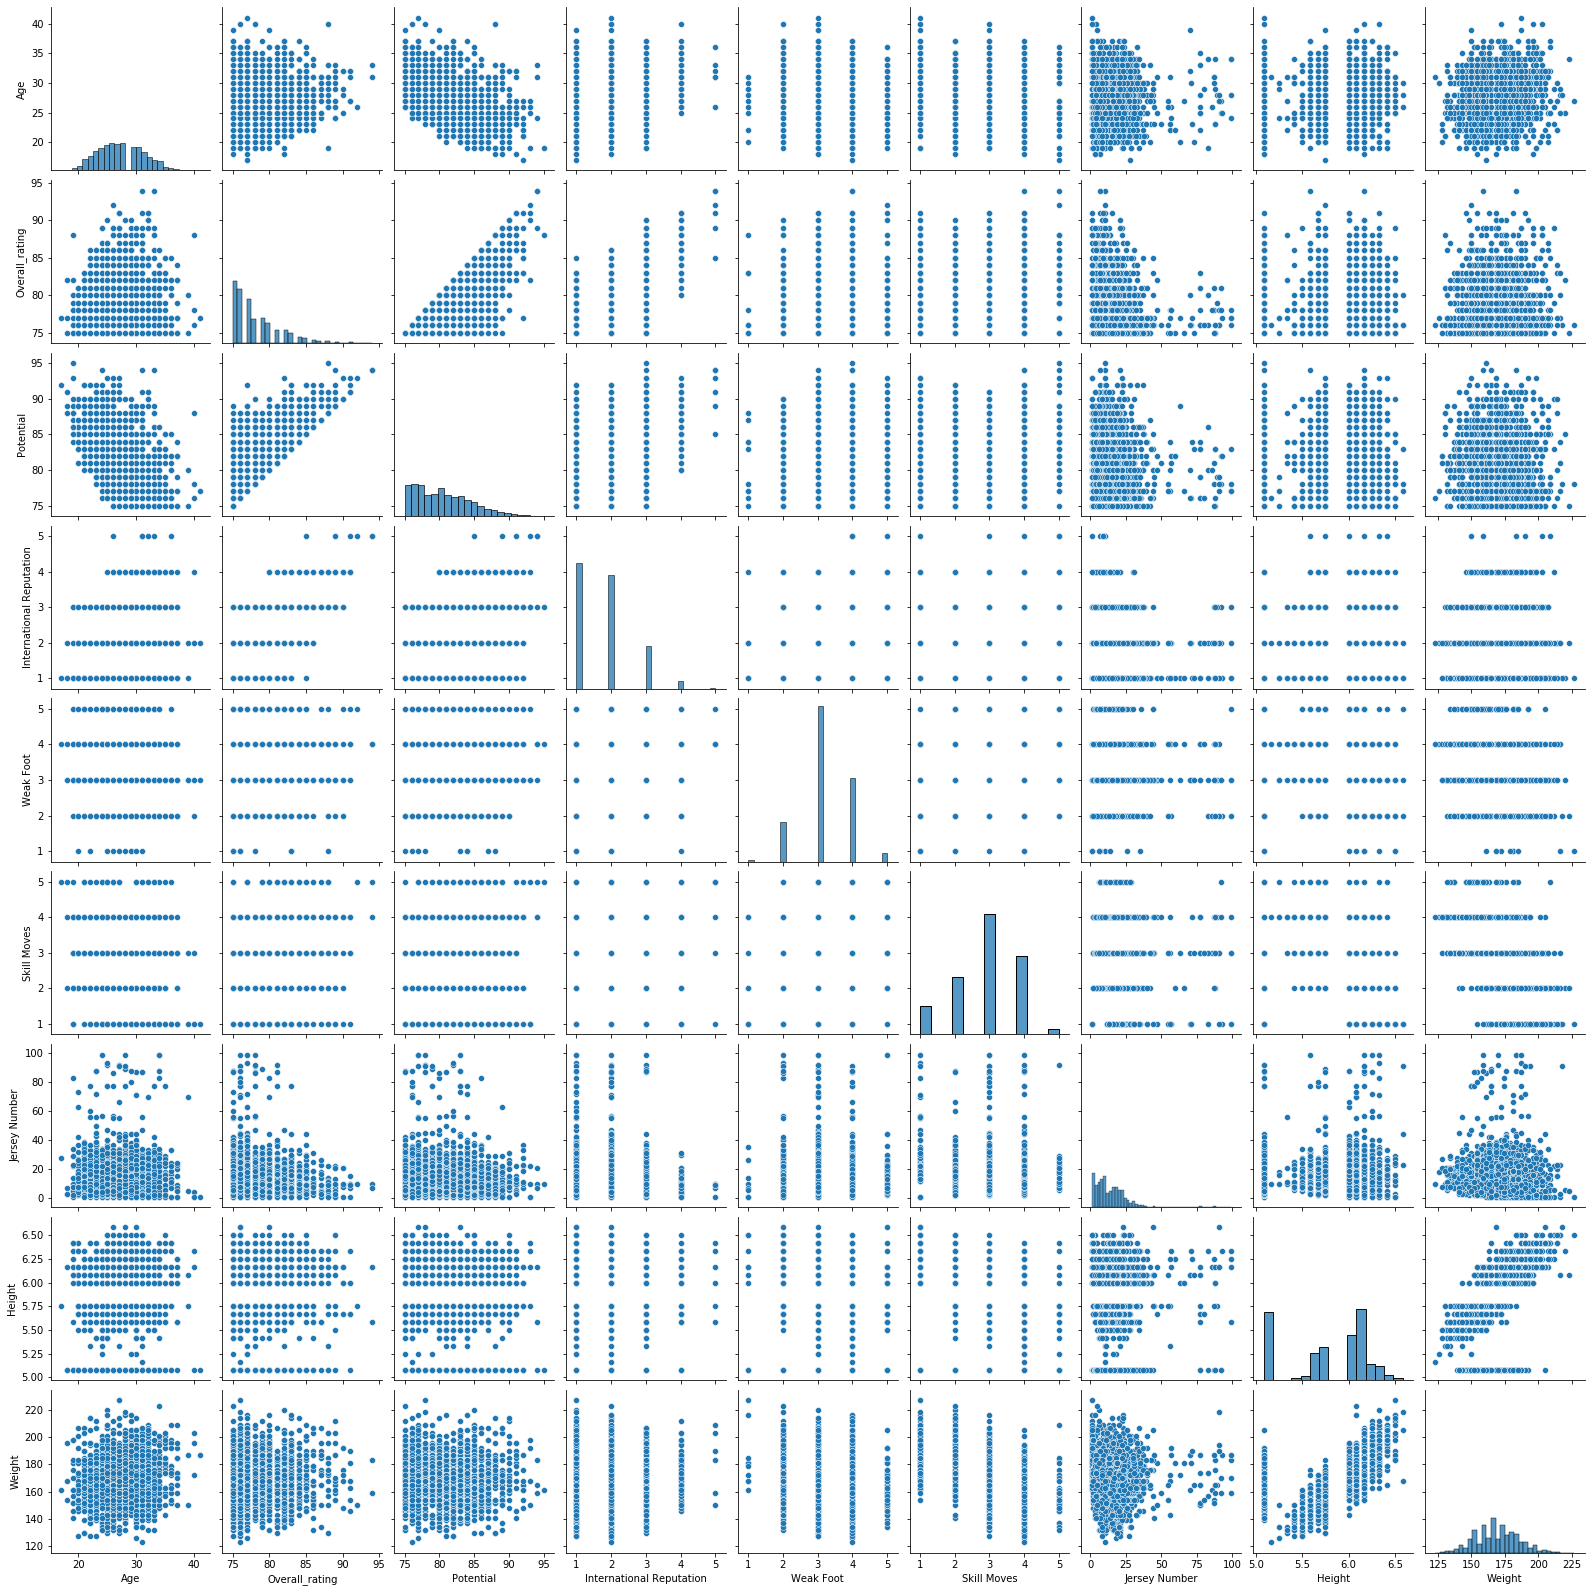

In [16]:
#Multivariate analysis:
sns.pairplot(fifa_df)
plt.show()

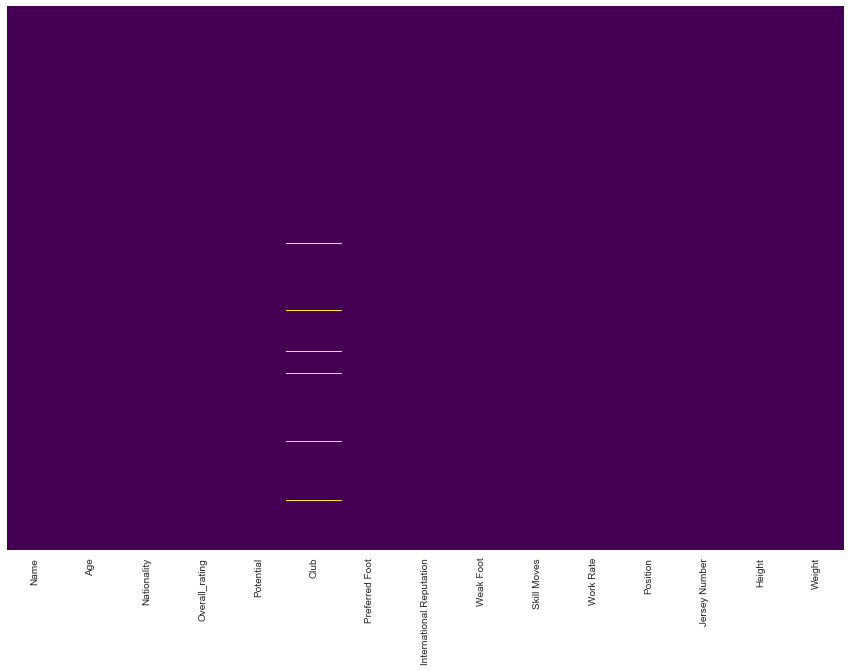

Percentage of null values in club: 0.95


In [22]:
# Missing Value Treatment
sns.heatmap(fifa_df.isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.show() 
print("Percentage of null values in club:",(fifa_df['Club'].isnull().sum()/len(fifa_df['Club']))*100)

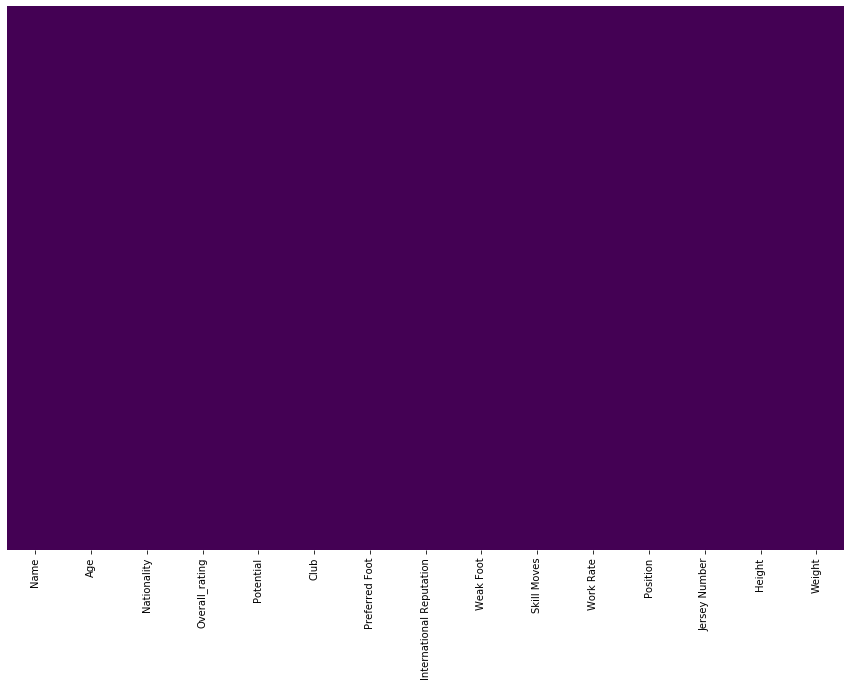

In [10]:
#Hardly 1% of data in Club variable are null which could be filled with the another category as unknown considering
# we do not want to lose any data

fifa_df['Club']=fifa_df['Club'].fillna('Unknown')
sns.heatmap(fifa_df.isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.show() 

In [24]:
#5. Transformation:

fifa_df['t_Overall_rating']=np.log(fifa_df['Overall_rating'])
fifa_df['t_Potential']=np.log(fifa_df['Potential'])
fifa_df['t_Age']=np.sqrt(fifa_df['Age'])
fifa_df['t_Weight']=np.sqrt(fifa_df['Weight'])
print("Skewness of Overall_rating after transformation:",fifa_df['t_Overall_rating'].skew())
print("Skewness of Potential after transformation:",stats.skew(fifa_df['t_Potential']))
print("Skewness of Age after transformation:",fifa_df['t_Age'].skew())
print("Skewness of Weight after transformation:",fifa_df['t_Weight'].skew())

Skewness of Overall_rating after transformation: 1.2571166239233833
Skewness of Potential after transformation: 0.5736174845260634
Skewness of Age after transformation: 0.02912188605343182
Skewness of Weight after transformation: 0.021556731031880657


In [25]:
#Wilk's test for original data
shapiro(fifa_df['Overall_rating']),shapiro(fifa_df['Potential']),shapiro(fifa_df['Age']),shapiro(fifa_df['Weight']),shapiro(fifa_df['Height'])

(ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39),
 ShapiroResult(statistic=0.9384800791740417, pvalue=5.016414837142018e-28),
 ShapiroResult(statistic=0.9883174300193787, pvalue=1.1409696104580647e-11),
 ShapiroResult(statistic=0.9962390661239624, pvalue=7.131625898182392e-05),
 ShapiroResult(statistic=0.8622757792472839, pvalue=9.966470482100504e-39))

In [26]:
#For transformed data
shapiro(fifa_df['t_Overall_rating']),shapiro(fifa_df['t_Potential']),shapiro(fifa_df['t_Age']),shapiro(fifa_df['t_Weight'])

#p-value < 0.05 Data is not normally distributed

(ShapiroResult(statistic=0.8641453981399536, pvalue=1.5673357970254289e-38),
 ShapiroResult(statistic=0.9448955655097961, pvalue=1.0523582431575159e-26),
 ShapiroResult(statistic=0.990659236907959, pvalue=4.747287007944578e-10),
 ShapiroResult(statistic=0.9975913166999817, pvalue=0.0037915678694844246))

*There are no missing values,no duplicate records
*All variables mapped to appropriate type - 5 numeric and 10 categoric
*Even after transformation, numeric data are not normally distributed although is reduced to some extent via transformation
*Dropping the transformed data

In [27]:
fifa_df.drop(['t_Overall_rating','t_Potential','t_Age','t_Weight'],axis=1,inplace=True)

-->Outlier Treatment:

From the box plot analysis, it was evident overall_rating requires outlier treatment. 
As the data follows non normal distribution, IQR method of outlier treatment is employed to reduce the skewness to some extent

In [11]:
# IQR Outlier treatment for Overall_rating:

q1=fifa_df['Overall_rating'].quantile(0.25)
q3=fifa_df['Overall_rating'].quantile(0.75)
IQR=q3-q1
fifa_df1=fifa_df[~((fifa_df.Overall_rating<(q1-1.5*IQR))|(fifa_df.Overall_rating>(q3+1.5*IQR)))]
print("Skewness of overallrating after outlier treatment:",fifa_df1['Overall_rating'].skew())
shapiro(fifa_df1['Overall_rating'])

Skewness of overallrating after outlier treatment: 0.9652187943069717


ShapiroResult(statistic=0.8778462409973145, pvalue=1.3596582414653054e-36)

As the data is not following normal distribution even after outlier treatment, non parametric tests will be employed

#### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size


#Central Limit Theorem
* CLT states that for a large sample drawn from a population with mean $\mu$ and standard deviation $\sigma$, the sampling distribution of mean, follows an approximate normal distribution with mean, μ and standard error σ / √(n) irrespective of the distribution of the population for large sample size.

* As a general rule, statisticians have found that for any population distribution, when the sample size is at least 30 & above, the sampling distribution of the mean is approximately **normal.**


In [8]:
#Population : Age feature of Fifa_df
print("Age: Population mean:",np.mean(fifa_df['Age']))
print("Age: Population standard deviation:",np.std(fifa_df['Age']))

Age: Population mean: 27.2315
Age: Population standard deviation: 3.8580963894127795


In [49]:
#Using the theoretical approach
#Sample: 
n = 200 #size
import random 
random.seed(15)
trial=[]
for i in np.arange(200):
    age_samp=[]
    for val in np.arange(200):
        age_samp.append(np.random.choice(fifa_df.Age))
        trial.append(np.mean(age_samp))
print("Age: Sample mean:",np.mean(trial))
print("Age: Sample standard error:",np.std(trial,ddof=1))

Age: Sample mean: 27.233418394898866
Age: Sample standard error: 0.634536603788219


Age: Skewness: 0.19710128351974346
Sample Age: Skewness: 0.02276975511416988


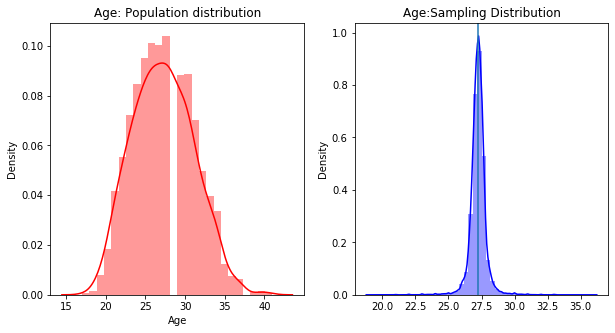

In [50]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
a=sns.distplot(fifa_df['Age'],color='red',ax=ax[0])
a.set_title("Age: Population distribution")
print("Age: Skewness:",fifa_df['Age'].skew())
b=sns.distplot(trial,color='blue',ax=ax[1])
plt.axvline(np.mean(trial))
b.set_title("Age:Sampling Distribution")
print("Sample Age: Skewness:",pd.Series(trial).skew())
plt.show()

In [51]:
# 95% confidence interval:
[np.mean(trial)-1.96*np.std(trial,ddof=1),np.mean(trial)+1.96*np.std(trial,ddof=1)]

[25.98972665147396, 28.477110138323773]

From the above range estimate of population mean, it suggests that the True mean 27.23 lies in the 95% confidence interval. Sample is a representation of population

In [54]:
#Using the practical approach of approximation
#Sample: 
n = 200 #size
import random 
random.seed(20)
age_samp=[]
for val in np.arange(200):
    age_samp.append(np.random.choice(fifa_df.Age))
        
print("Age: Sample mean:",np.mean(age_samp))
print("Age: Sample standard deviation:",np.std(age_samp,ddof=1))
print("Age: Sample standard error:",np.std(age_samp,ddof=1)/(np.sqrt(n)))

# 95% confidence interval:
[np.mean(age_samp)-1.96*(np.std(age_samp,ddof=1)/np.sqrt(200)),np.mean(age_samp)+1.96*(np.std(age_samp,ddof=1)/np.sqrt(200))]

Age: Sample mean: 27.19
Age: Sample standard deviation: 3.9511972614632866
Age: Sample standard error: 0.27939183773864057


[26.642391998032267, 27.737608001967736]

Just as in the theoretical approach, the above range estimate of population mean suggests that the True mean 27.23 lies in the 95% confidence interval. Sample is a representation of population

Age: Skewness: 0.19710128351974346
Sample Age: Skewness: 0.1466140784531886


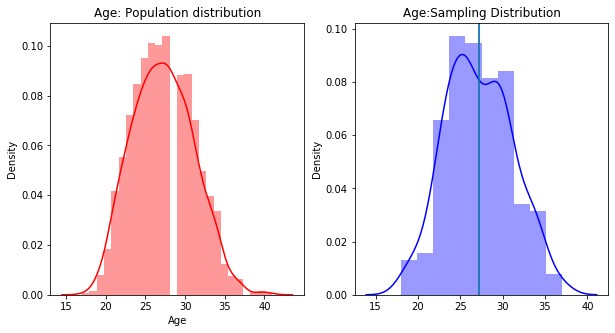

In [55]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
a=sns.distplot(fifa_df['Age'],color='red',ax=ax[0])
plt.axvline(np.mean(fifa_df['Age']))
a.set_title("Age: Population distribution")
print("Age: Skewness:",fifa_df['Age'].skew())
b=sns.distplot(age_samp,color='blue',ax=ax[1])
plt.axvline(np.mean(age_samp))
b.set_title("Age:Sampling Distribution")
print("Sample Age: Skewness:",pd.Series(age_samp).skew())
plt.show()

Both the theoretical and practical approaches show that the **sampling distribution is approximately following normal distribution** with 95% confidence interval comprising the population mean

In [56]:
n = [200,400,600,800] #size
age_samp=[]
for i in n:
    for val in np.arange(i):
        age_samp.append(np.random.choice(fifa_df.Age))
    print("Age: Sample standard error for sample size",i,":",np.std(age_samp,ddof=1)/(np.sqrt(i)))

Age: Sample standard error for sample size 200 : 0.26487861067281326
Age: Sample standard error for sample size 400 : 0.18816837837405648
Age: Sample standard error for sample size 600 : 0.15491152364944347
Age: Sample standard error for sample size 800 : 0.13501268051353446


From above it is clear that **increase in the sample size leads to decrease in the standard error of sample mean**.
--This can be understood by the fact that more the **number of samples we consider (closer to the whole population) less is the variation/deviation from the actual average of a data (True mean or population mean)** and hence lesser the error.
--when the sample size is larger it is equivalent to being closer to the whole population which implies more and more clusters around the actual/true mean of the data into consideration

#### b)	Is there any evidence that the players overall rating is greater than 80?

In [12]:
#considering that overall_rating is a right skewed data below is the data after outlier treatment where skewness is reduced to some extent

fifa_df1['Overall_rating'].describe() 

count    1945.000000
mean       77.898201
std         2.788483
min        75.000000
25%        76.000000
50%        77.000000
75%        80.000000
max        86.000000
Name: Overall_rating, dtype: float64

In [13]:
#Test of normality
shapiro(fifa_df1['Overall_rating'])

#P-value < 0.05 Hence data is not normally distributed

ShapiroResult(statistic=0.8778462409973145, pvalue=1.3596582414653054e-36)

###### Null Hypothesis H0: Median <= 80 ; Alternate Hypothesis H1: Median > 80

In [14]:
#Non parametric - Wilcoxon Rank test is used
alpha = 0.05 #95% confidence interval
tstat,p_val = stats.wilcoxon(fifa_df1['Overall_rating'],alternative='greater')
print("P-value:",p_val)

#It is clear that p-value < 0.05 Hence we can reject the null hypothesis. 
#At 95% confidence interval there is enough evidence to claim that Median of Overall_rating is greater than 80

P-value: 0.0


#### c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

*It was seen from above EDA analysis that the feature Potential is not normally distributed. Hence Non parametric -Mann Whitney U Test is being used here as no of levels is 2 in categoric variable 'preferred foot'*

In [15]:
df=fifa_df1[['Preferred Foot','Potential']]
left=fifa_df1['Potential'][(df['Preferred Foot']=='Left')]
right=fifa_df1['Potential'][(df['Preferred Foot']=='Right')]

shapiro(left),shapiro(right)
#Both the groups have non normal distribution so non parametric test is used

(ShapiroResult(statistic=0.9445937275886536, pvalue=6.137701024505615e-12),
 ShapiroResult(statistic=0.9413395524024963, pvalue=7.184307725141557e-24))

In [208]:
#Null Hypothesis H0: Both groups have same Median. There is no difference =>Preferred foot has no impact on Potential
#Alternate Hypothesis H1: Both groups have different median. There is a difference=>Preferred foot has impact on Potential

In [16]:
test_stat, p_value = stats.mannwhitneyu(left, right, alternative = 'two-sided')

print('p-value:', p_value)

#P-value > 0.05. Hence we cannot reject the Null hypothesis. both the groups have same median. No effect of Prefeered foot on Potential
#At 95% confidence interval, we do not have enough compelling evidence that Preferred has an impact on Potential

p-value: 0.2895889779413203


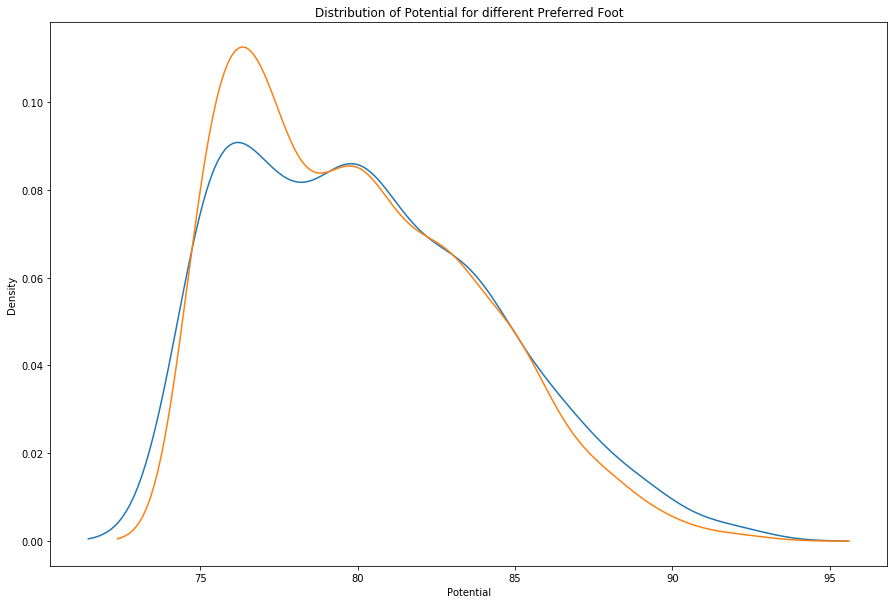

In [17]:
plt.title("Distribution of Potential for different Preferred Foot")
sns.kdeplot(left,label='Left_potential')
sns.kdeplot(right,label='Right_potential');
#Below graph also suggests there is not much difference in Potential for the 2 gropus of Preferred Foot

#### d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [21]:
df=fifa_df1[['Overall_rating','Potential']]

shapiro(df['Overall_rating']),shapiro(df['Potential'])
#Both Overall_rating and Potential are numeric data points and are not normally distributed. p-value<0.05 
#Hence Non parametric statistical Measure - Spearman's Rank Correlation coefficient is used

(ShapiroResult(statistic=0.8778462409973145, pvalue=1.3596582414653054e-36),
 ShapiroResult(statistic=0.9424351453781128, pvalue=7.173737753220597e-27))

In [ ]:
#Null Hypothesis: H0: There is no monotonic relationship between the 2 numeric variables in population
#Alternate Hypothesis: H1: There is a monotonic relationship between the 2 variables

In [20]:
coef,p_val=stats.spearmanr(df['Overall_rating'],df['Potential'])
print("P-value:",p_val)
print("correlation Coefficient:",coef)

# p-value < 0.05, we can reject null hypothesis
# We can conclude that there is a strong positive relation between overall_rating and potential i.e As one variable increases other one also increases

P-value: 1.2381263844886318e-247
correlation Coefficient: 0.6640314023799623


#### e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

*It was seen from above EDA analysis that the feature Overallrating is not normally distributed even after outlier treament. Hence Non parametric - Kruskal Wallis H Test*

In [22]:
#Population dataset
df=fifa_df1[['Skill Moves','Overall_rating']]
df.groupby(by=["Skill Moves"])['Overall_rating'].count()

Skill Moves
1    185
2    387
3    813
4    527
5     33
Name: Overall_rating, dtype: int64

In [23]:
a=df['Overall_rating'][(df['Skill Moves']==1)]
b=df['Overall_rating'][(df['Skill Moves']==2)]
c=df['Overall_rating'][(df['Skill Moves']==3)]
d=df['Overall_rating'][(df['Skill Moves']==4)]
e=df['Overall_rating'][(df['Skill Moves']==5)]

shapiro(a),shapiro(b),shapiro(c),shapiro(d),shapiro(e)
#Atleast one of the groups have non normal distribution so non parametric test is used

(ShapiroResult(statistic=0.8988749384880066, pvalue=6.633753546481103e-10),
 ShapiroResult(statistic=0.8436893224716187, pvalue=3.7434162018663837e-19),
 ShapiroResult(statistic=0.8498467206954956, pvalue=4.535779952813734e-27),
 ShapiroResult(statistic=0.9206315279006958, pvalue=4.929495642585981e-16),
 ShapiroResult(statistic=0.9601017236709595, pvalue=0.2601987421512604))

In [ ]:
#Null Hypothesis H0: All groups have same Median. There is no difference =>Skill Moves have no impact on Overall_rating
#Alternate Hypothesis H1: Atleast one of the groups have different median. There is a difference=>Skill Moves have impact on Overall_rating

In [422]:
#for alpha = 0.05, degree of freedom 4
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 4), 4))
print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 9.4877


In [24]:
test_stat, p_val = stats.kruskal(a,b,c,d,e)

print('Test statistic:', test_stat)
print('p-value:', p_val)

#P-value < 0.05 Hence we can reject Null Hypothesis. 
#At 95% confidence interval and sample size of 30 for each group, we have enough evidence to say that Skill Moves have impact on Overall_rating

Test statistic: 91.30634181120656
p-value: 6.949618448129485e-19


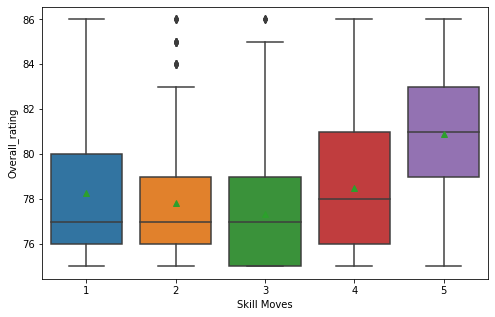

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Skill Moves',y='Overall_rating',data=df,showmeans=True)
plt.show()

#We could observe from below that overall_rating with skill move 5 is significantly different from others

# Phone Dataset

**2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 
Note: 
1) Perform all the Statistical analysis with 5%(Significance level). 
2) Perform the test of normality and test of variance in the appropriate places.**


In [55]:
#Importing/reading the dataset
mobile_df=pd.read_csv('phone.csv')
mobile_df.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [27]:
#Understanding the variables
mobile_df.info()

#1. There are no null values
#2. Incorrect data types: Date should be mapped as Datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
date            820 non-null object
duration        820 non-null float64
item            820 non-null object
month           820 non-null object
network         820 non-null object
network_type    820 non-null object
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [28]:
mobile_df['date']=pd.to_datetime(mobile_df['date'])

#After data type correction:
mobile_df.info()

#there is one Date type, one numeric variable and 4 categoric variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
date            820 non-null datetime64[ns]
duration        820 non-null float64
item            820 non-null object
month           820 non-null object
network         820 non-null object
network_type    820 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 38.6+ KB


In [29]:
#checking for duplicacies:
mobile_df[(mobile_df.duplicated())==True]

#There are no duplicate records

,date,duration,item,month,network,network_type


In [30]:
#Descriptive Statistics:
#a. for numeric variables
mobile_df.describe()

#From below it could be understood that, there is a large variation in duration dataset as standard deviation is large

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


In [31]:
#b. for categoric variables
mobile_df.describe(include=np.object)

#From below, it could be understood that:
    #1. There are more users of calls than internet or sms
    #2. Mobiles are preferred by ost of the users than landline, voicemail or internet data
    #3. Network named Three is mostly used by the users in the given dataset

,item,month,network,network_type
count,820,820,820,820
unique,3,5,7,4
top,call,2014-11,Three,mobile
freq,388,229,215,601


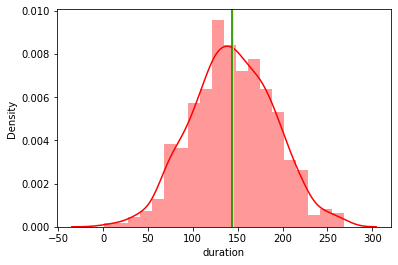

0.005764422490882374

In [113]:
#Univariate Analysis:
#a. For numeric variable:
sns.distplot(mobile_df['duration'],color='red')
plt.axvline(np.mean(mobile_df['duration']),color='yellow')
plt.axvline(mobile_df['duration'].median(),color='green')
plt.show()
mobile_df['duration'].skew()

#Both Mean and median are almost coinciding the data follows a normal distribution and skewness also suggests the same

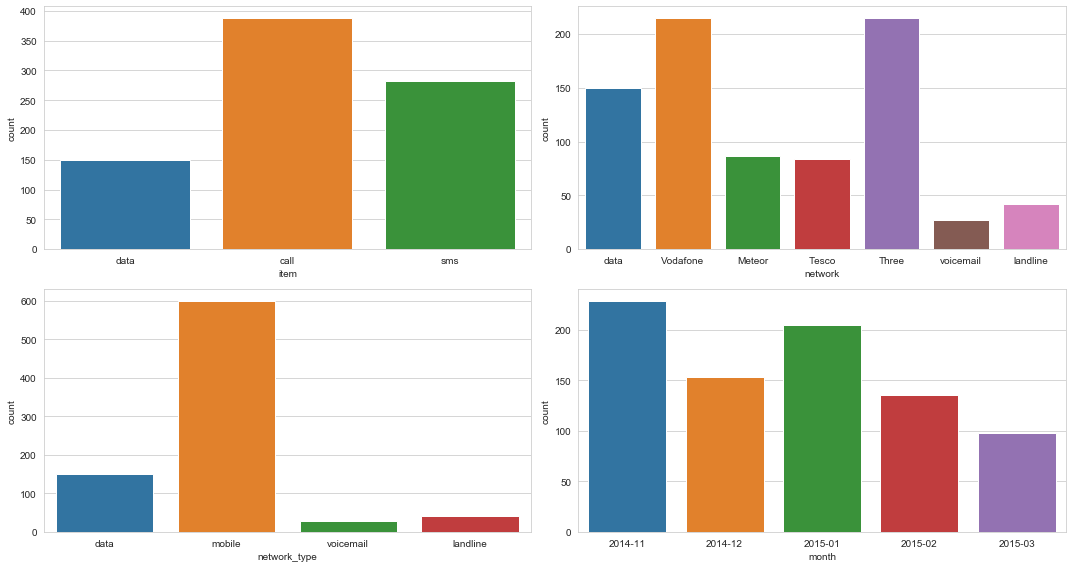

In [126]:
#b. Categoric variables:

plt.rcParams["figure.figsize"]=[15,8]
fig,ax=plt.subplots(2,2)
sns.set_style(style='whitegrid')
sns.countplot(x=mobile_df['item'],ax=ax[0][0])
sns.countplot(x=mobile_df['network'],ax=ax[0][1])
sns.countplot(x=mobile_df['network_type'],ax=ax[1][0])
sns.countplot(x=mobile_df['month'],ax=ax[1][1])
plt.tight_layout()
plt.show()

#Observations:
    #1. Internet data usage is the least while calls and sms are preferred
    #2. Three followed by Vodafone are the 2 most popular network types
    #3. Mobiles are predominantly used than landline

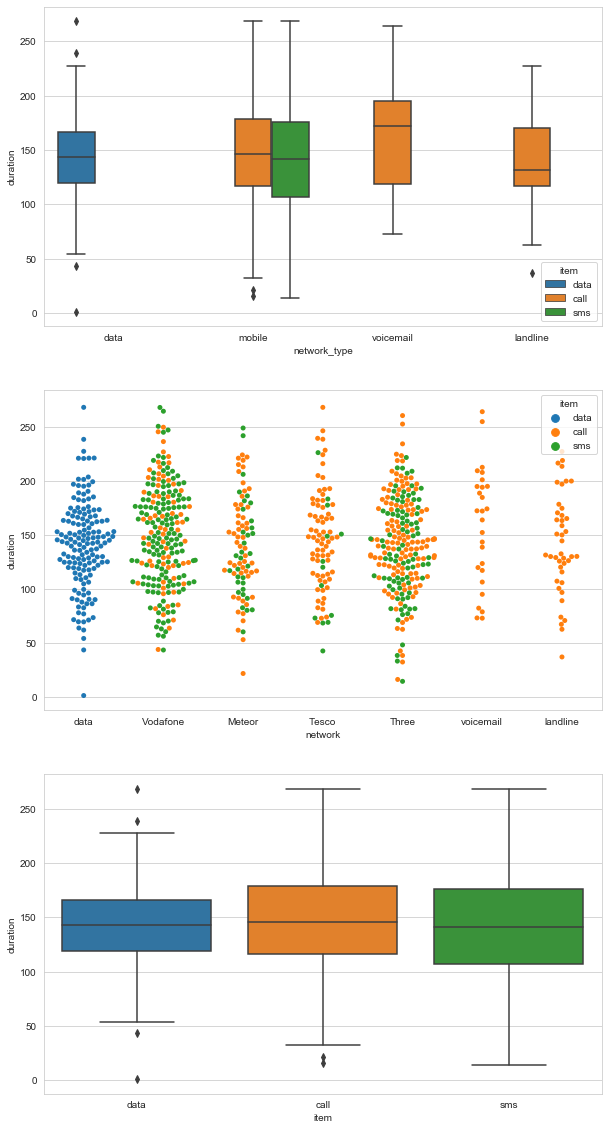

In [160]:
#Bivairate/Multivariate analysis:

fig,ax=plt.subplots(3,1,figsize=(10,20))
sns.boxplot(x=mobile_df['network_type'],y=mobile_df['duration'],hue=mobile_df['item'],data=mobile_df,ax=ax[0])
sns.swarmplot(x=mobile_df['network'],y=mobile_df['duration'],hue=mobile_df['item'],data=mobile_df,ax=ax[1])
sns.boxplot(x=mobile_df['item'],y=mobile_df['duration'],ax=ax[2])
plt.show()

#1. Inspite of less usage median of network type- voicemail is highest for calls
#2. There are some extreme values associated with the usage of internet data and on an average duration is close to 145hrs
#3. With respect to network, Vodafone seems to be mostly used for sms and Three is used mostly for calls.
#4. There does not seem to have a great difference in median of duration for the different items - calls, data and sms

#### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [32]:
#Dataset:Duration data follows almost a normal distubtion
df=mobile_df['duration'][(mobile_df['item'])=='call']

shapiro(df) #Sample data- duration for calls follows normal distribution as p-value>0.05

ShapiroResult(statistic=0.9973040819168091, pvalue=0.7803040742874146)

In [37]:
#99% confidence interval:
CI=0.99
alpha=0.01
mean=np.mean(df)
s=np.std(df,ddof=1)/np.sqrt(len(df))
interval_1 = stats.norm.interval(0.99,loc=mean,scale=s)
print("99% Confidence interval:",interval_1)

99% Confidence interval: (141.51560033670074, 153.6911428765518)


In [38]:
#95% confidence interval:
CI=0.95
alpha=0.05
mean=np.mean(df)
s=np.std(df,ddof=1)/np.sqrt(len(df))
interval_2 = stats.norm.interval(0.95,loc=mean,scale=s)
print("95% Confidence interval:",interval_2)

95% Confidence interval: (142.971149891184, 152.23559332206852)


In [ ]:
# Increase in level of confidence,increases the range of the interval.
# Hence,when the range is high, there is a high chance that population mean lies in betweeen the interval.

**The range estimate of average duration of calls made by all network has wider interval at 99% confidence interval**

#### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [39]:
df=mobile_df['network']
df.describe()

count       820
unique        7
top       Three
freq        215
Name: network, dtype: object

In [393]:
#Null Hypothesis: H0: Observed values = Expected values Networks are equally distributed
#Alternate Hypothesis: H1: Observed values != Expected Values =>Networks are not equally distributed

In [41]:
observed_values=df.value_counts()
observed_values

Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [42]:
n=820
expected_values=np.array([n/7 for i in range(7)])
expected_values

array([117.14285714, 117.14285714, 117.14285714, 117.14285714,
       117.14285714, 117.14285714, 117.14285714])

In [43]:
stat,p_val = stats.chisquare(f_obs = observed_values,f_exp=expected_values)
print("P-value:",p_val)

#p-value<0.05 we can reject Null hypothesis
#At 95% confidence interval we can conclude that, networks are not equally distributed in the given dataset

P-value: 2.112592760257685e-63


#### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

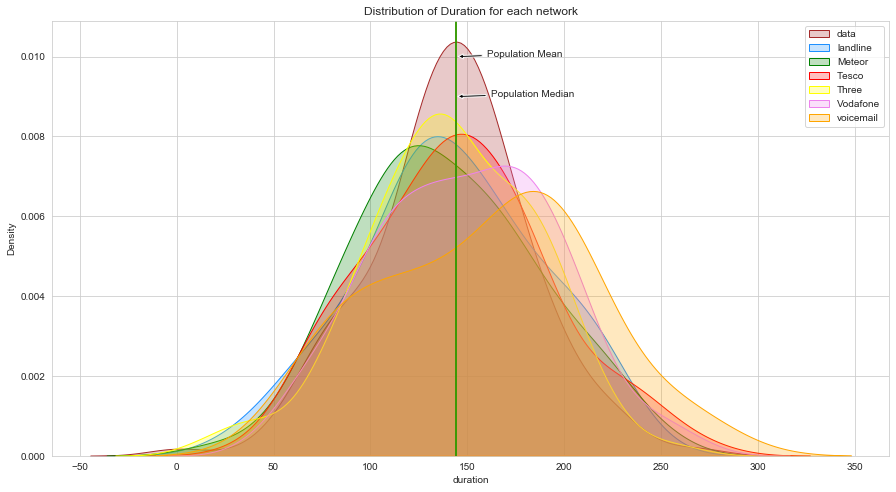

In [272]:
ax=sns.kdeplot(x=mobile_df['duration'][mobile_df['network']=='data'],color='brown',shade=True)
ax=sns.kdeplot(x=mobile_df['duration'][mobile_df['network']=='landline'],color='dodgerblue',shade=True)
ax=sns.kdeplot(x=mobile_df['duration'][mobile_df['network']=='Meteor'],color='green',shade=True)
ax=sns.kdeplot(x=mobile_df['duration'][mobile_df['network']=='Tesco'],color='red',shade=True)
ax=sns.kdeplot(x=mobile_df['duration'][mobile_df['network']=='Three'],color='yellow',shade=True)
ax=sns.kdeplot(x=mobile_df['duration'][mobile_df['network']=='Vodafone'],color='violet',shade=True)
ax=sns.kdeplot(x=mobile_df['duration'][mobile_df['network']=='voicemail'],color='orange',shade=True)
ax.legend(['data','landline','Meteor','Tesco','Three','Vodafone','voicemail'])
ax.set_title("Distribution of Duration for each network")
plt.axvline(np.mean(mobile_df['duration']),color='yellow')
plt.axvline(mobile_df['duration'].median(),color='green')
plt.annotate(s = 'Population Mean', xy = (144.3, 0.01), xytext = (160, 0.01), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))
plt.annotate(s = 'Population Median', xy = (144.1, 0.009), xytext = (162, 0.009), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))
plt.show()

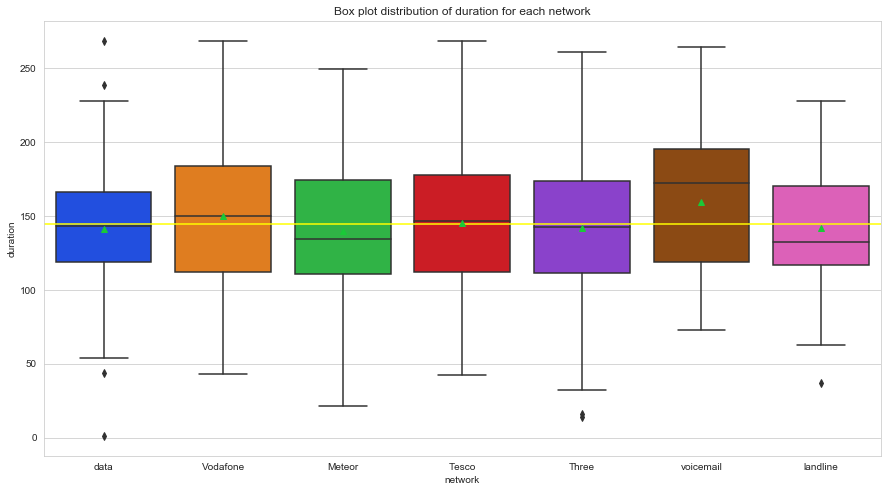

In [279]:
sns.boxplot(x='network',y='duration',data=mobile_df,showmeans=True)
plt.axhline(mobile_df['duration'].median(),color='yellow')
plt.title("Box plot distribution of duration for each network")
plt.show()

In [ ]:
#From the above graphs of distribution of Duration, it is clear the data is symmetric with the mean and median almost coinciding
#Taking each network into consideration,
    #1.The duration of Data as network seems to be skewed with presence of outliers
    #2. For networks Three and Landline there is minimal outliers and hence distribution is slightly left skewed
    #3. On an average, Voicemail which follows a skewed distribution has the highest duration, followed by Vodafone which has almost normal distribution
    #4. There is not significant difference in duration for networks - Three, Tesco and Data
    #5. On an average duration of network Meteo and Landline has no big difference

#### d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [47]:
#During EDA process, It was found that duration for all items follows a normal distribution

df=mobile_df[['item','duration']]
df['item'].value_counts()

call    388
sms     282
data    150
Name: item, dtype: int64

In [56]:
shapiro(df['duration']) 
#p-value>0.05, Data is normally distributed

ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)

In [57]:
call= df[df['item']=='call']['duration']
sms= df[df['item']=='sms']['duration']
data= df[df['item']=='data']['duration']

#Using levene test, it was found that All groups have almost equal variances

##### One way ANOVA test

In [372]:
#Null Hypothesis H0: Average duration is same for all items
#Alternate Hypothesis H1: Average duration atleast 1 item is different

In [60]:
stats.f_oneway(call,sms,data)

F_onewayResult(statistic=1.9313964906864993, pvalue=0.1456068656611744)

In [ ]:
#p-value > 0.05, we fail to reject Null hypothesis
#At 95% confidence interval we can conclude that, Average duration is same for almost all items(call,sms,data)

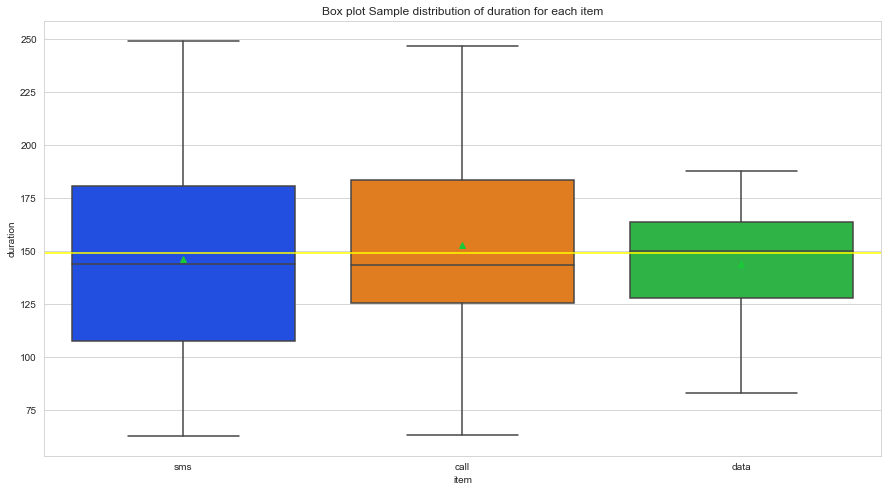

In [376]:
sns.boxplot(x='item',y='duration',data=sample,showmeans=True)
plt.axhline(sample['duration'].mean(),color='yellow')
plt.title("Box plot Sample distribution of duration for each item")
plt.show()

#The below graph also suggests that given the sample dataset, there is not much significant difference in average duration for the items

#### e)	Perform statistical tests to identify the relation between network and network_type. 

Both network and network type are categoric types of data. In order to identify the relation between 2 categoric variables, **chi square test of independence is being used**

In [ ]:
#Null Hypothesis: H0: Both network and network_type are independent/not related
#Alternate Hypothesis: H1: Both variables are dependent/related to each other

In [62]:
table=pd.crosstab(mobile_df['network'],mobile_df['network_type'])
table

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [63]:
observed_values=table.values
observed_values

array([[  0,   0,  87,   0],
       [  0,   0,  84,   0],
       [  0,   0, 215,   0],
       [  0,   0, 215,   0],
       [150,   0,   0,   0],
       [  0,  42,   0,   0],
       [  0,   0,   0,  27]], dtype=int64)

In [64]:
stat,p_val,dof,exp_val=stats.chi2_contingency(observed=observed_values,correction=False)

print("P-Value:",p_val)

P-Value: 0.0


In [ ]:
#P-value< 0.05 We can reject null hypothesis
#At 95%confidence interval, we can conclude that Network and network_type are related to each other